<a href="https://colab.research.google.com/github/Jaiharish-passion07/Facial_emotion_capstone_project_final/blob/master/Model_Notebooks/Individual_Notebook_Jai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
#import all necessary layers
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import seaborn as sns
### CNN models ###
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
# !unzip "/content/drive/MyDrive/Facial_Emotion_capstone_project/archive.zip" -d "/content/face/"

In [ ]:
#reading csv dataset
df=pd.read_csv("/content/face/fer2013.csv")

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
# Defining the parameters used in this project
batch_size = 32
num_epochs = 50
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

In [ ]:
#image processing
df['pixels']=df['pixels'].astype("string")
pixels = df['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5
faces -= 1.
emotions = pd.get_dummies(df['emotion']).to_numpy()

In [ ]:
#dataset sp,it for training model 
X_train, X_valid, y_train, y_valid = train_test_split(faces,emotions,
                                                    shuffle=True,
                                                    test_size=0.2, random_state=42)
X_valid,X_test,y_valid,y_test=train_test_split(faces,emotions,test_size=0.2,shuffle=True)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1),
 (28709, 48, 48, 1),
 (28709, 7),
 (28709, 7),
 (7178, 48, 48, 1),
 (7178, 7))

In [ ]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,         # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.15,    # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,   # randomly shift images vertically (fraction of total height)
    shear_range=0.15,
    zoom_range=0.15,           # randomly zoom into images
    horizontal_flip=True,      # randomly flip images
)
train_datagen.fit(X_train)

In [ ]:
# #model history for further evaluation the performance
# xception_history =xception.fit(train_datagen.flow(X_train, y_train, batch_size),
#           steps_per_epoch=len(X_train) / batch_size, 
#           epochs=num_epochs, 
#           verbose=1, 
#           callbacks=callbacks,
#           validation_data=(X_valid,y_valid))

In [ ]:
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense,Dropout
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.densenet import DenseNet121

In [ ]:
DenseNet121 = DenseNet121(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)
dense_net_model = Model(inputs=DenseNet121.input, outputs=DenseNet121.output)
dense_net_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
dense_net_history=dense_net_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          validation_data=(X_valid,y_valid))

In [ ]:
#VGG16 = VGG16(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)
MobileNet = MobileNet(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)
ResNet50 = ResNet50(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)
DenseNet121 = DenseNet121(input_shape=[48,48]+ [1], weights=None, include_top=True,classes=7)

In [ ]:
# # don't train existing weights
# for layer in VGG16.layers:
#     layer.trainable = True

In [ ]:
# # Step 3 - Flattening
# x=Flatten()(VGG16.output)
# x=Dense(units=600, activation='relu')(x)
# x=Dropout(.2)(x)
# x=Dense(units=860, activation='relu')(x)
# x=Dropout(.3)(x)
# x=Dense(units=120, activation='relu')(x)
# pred=Dense(units=7, activation='softmax')(x)

In [ ]:
# create a model object
#vgg_model = Model(inputs=VGG16.input, outputs=VGG16.output)
mobile_model = Model(inputs=MobileNet.input, outputs=MobileNet.output)
resnet_model = Model(inputs=ResNet50.input, outputs=ResNet50.output)
dense_net_model = Model(inputs=DenseNet121.input, outputs=DenseNet121.output)

In [ ]:
# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01) #using Adam Optimizer
#vgg_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
mobile_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
dense_net_model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# #model history for the matrics evaluation
# vgg_history =vgg_model.fit(train_datagen.flow(X_train, y_train, batch_size),
#           steps_per_epoch=len(X_train) / batch_size, 
#           epochs=3, 
#           validation_data=(X_valid,y_valid))

In [ ]:
#model history for the matrics evaluation
mobile_history =mobile_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          validation_data=(X_valid,y_valid))

Epoch 1/3
897/897 [==============================] - 40s 41ms/step - loss: 1.9188 - accuracy: 0.2512 - val_loss: 1.7862 - val_accuracy: 0.2567
Epoch 2/3
897/897 [==============================] - 39s 43ms/step - loss: 1.7772 - accuracy: 0.2610 - val_loss: 1.7528 - val_accuracy: 0.2854
Epoch 3/3
897/897 [==============================] - 39s 43ms/step - loss: 1.7588 - accuracy: 0.2791 - val_loss: 1.7327 - val_accuracy: 0.3063


In [ ]:
#model history for the matrics evaluation
resnet_history =resnet_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          validation_data=(X_valid,y_valid))

Epoch 1/3
897/897 [==============================] - 77s 78ms/step - loss: 2.2322 - accuracy: 0.2489 - val_loss: 1.8350 - val_accuracy: 0.2499
Epoch 2/3
897/897 [==============================] - 75s 84ms/step - loss: 1.7921 - accuracy: 0.2517 - val_loss: 1.8619 - val_accuracy: 0.2563
Epoch 3/3
897/897 [==============================] - 86s 96ms/step - loss: 1.7852 - accuracy: 0.2565 - val_loss: 1.8283 - val_accuracy: 0.2612


In [ ]:
dense_net_history=dense_net_model.fit(train_datagen.flow(X_train, y_train, batch_size),
          steps_per_epoch=len(X_train) / batch_size, 
          epochs=3, 
          validation_data=(X_valid,y_valid))

Epoch 1/3
897/897 [==============================] - 149s 139ms/step - loss: 1.9689 - accuracy: 0.2381 - val_loss: 1.8007 - val_accuracy: 0.2577
Epoch 2/3
897/897 [==============================] - 122s 136ms/step - loss: 1.7803 - accuracy: 0.2602 - val_loss: 1.7510 - val_accuracy: 0.2732
Epoch 3/3
897/897 [==============================] - 123s 138ms/step - loss: 1.7337 - accuracy: 0.2847 - val_loss: 1.9125 - val_accuracy: 0.2396


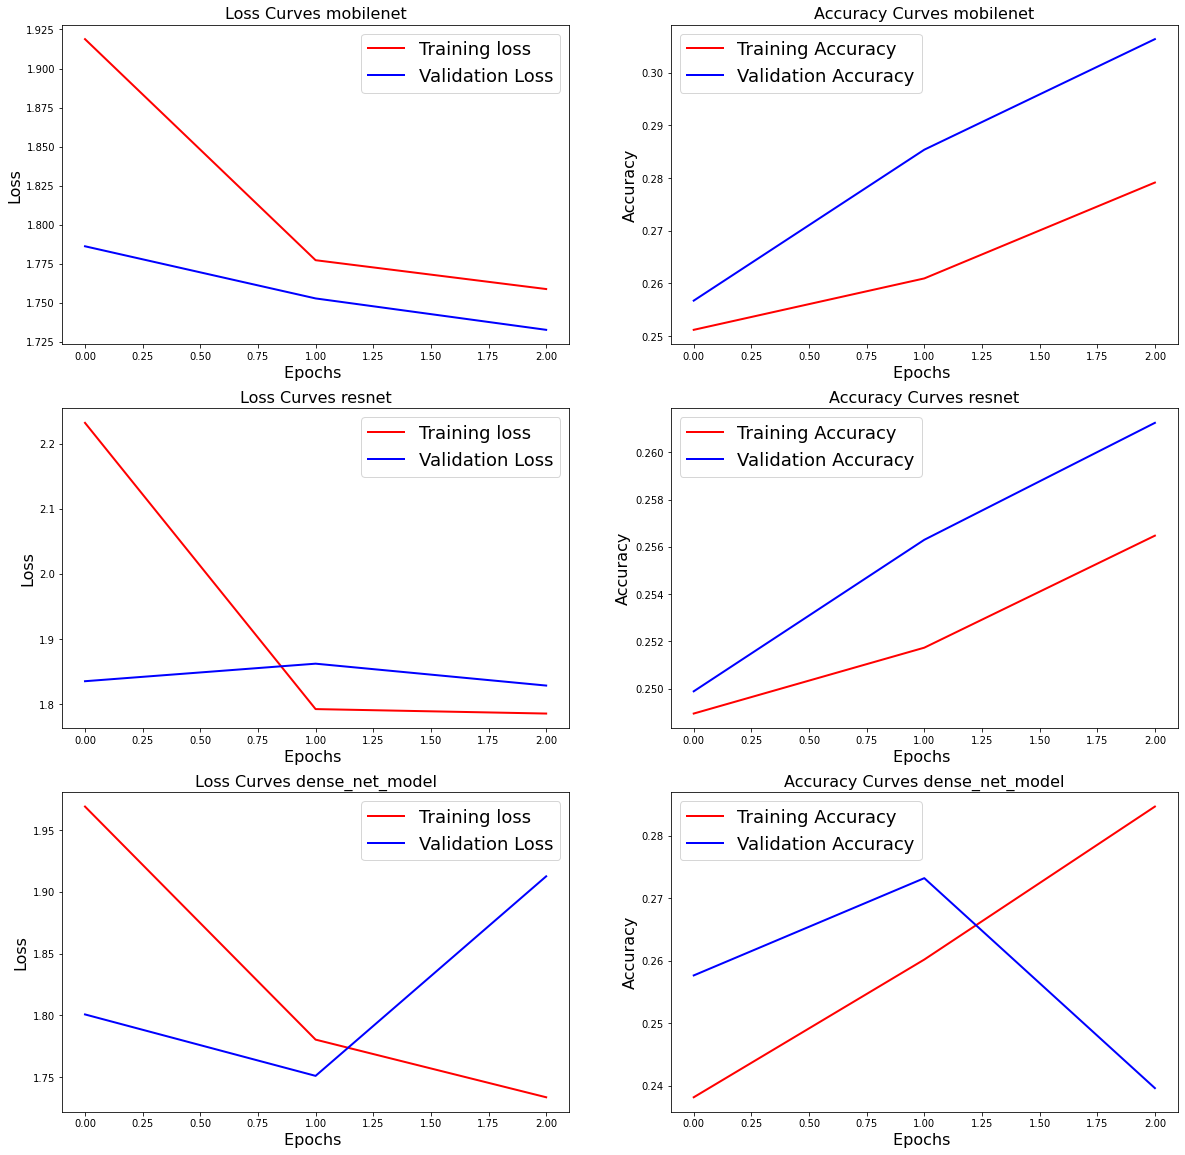

In [ ]:
#for ploting the performance plot for all three model
fig,axes=plt.subplots(3,2,figsize=(20, 20))
for (m,history), ax in zip({'mobilenet':mobile_history,'resnet':resnet_history,'dense_net_model':dense_net_history}.items(),axes):
    # Loss Curves
      ax[0].plot(history.history['loss'],'r',linewidth=2.0)
      ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
      ax[0].legend(['Training loss', 'Validation Loss'],fontsize=18)
      ax[0].set_xlabel('Epochs ',fontsize=16)
      ax[0].set_ylabel('Loss',fontsize=16)
      ax[0].set_title('Loss Curves '+m,fontsize=16)
  
      # Accuracy Curves
      ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
      ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
      ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
      ax[1].set_xlabel('Epochs ',fontsize=16)
      ax[1].set_ylabel('Accuracy',fontsize=16)
      ax[1].set_title('Accuracy Curves '+m,fontsize=16)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#classification record of all three model
for model in [mobile_model,resnet_model,dense_net_model]:
    ypred=model.predict(X_test)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(y_test, axis=1)
    print(classification_report(ytest_, ypred_,digits=3))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.134     1.000     0.237       965
           1      0.000     0.000     0.000        93
           2      0.000     0.000     0.000      1039
           3      0.000     0.000     0.000      1795
           4      0.000     0.000     0.000      1241
           5      0.000     0.000     0.000       811
           6      0.000     0.000     0.000      1234

    accuracy                          0.134      7178
   macro avg      0.019     0.143     0.034      7178
weighted avg      0.018     0.134     0.032      7178



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.140     0.459     0.214       965
           1      0.000     0.000     0.000        93
           2      0.124     0.313     0.178      1039
           3      0.277     0.213     0.241      1795
           4      0.000     0.000     0.000      1241
           5      0.000     0.000     0.000       811
           6      0.000     0.000     0.000      1234

    accuracy                          0.160      7178
   macro avg      0.077     0.141     0.090      7178
weighted avg      0.106     0.160     0.115      7178

              precision    recall  f1-score   support

           0      0.196     0.335     0.247       965
           1      0.000     0.000     0.000        93
           2      0.000     0.000     0.000      1039
           3      0.435     0.130     0.201      1795
           4      0.239     0.237     0.238      1241
           5      0.213     0.821     0.338       811
           6      0.282 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
